# Prediction Using Unsupervised Learning

**In This Project, We have to Predict of Iris Dataset using Unsupervised Learning. Task from The Spark Foundation**

**Dataset link : https://bit.ly/3kXTdox**

**For More Details: https://www.linkedin.com/in/mabtoormabx/**

**Github Repo https://github.com/Mabtoor-Mabx**

# 1- Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

# 2- Load Dataset

In [2]:
iris_dataset = pd.read_csv('Iris.csv')

In [3]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3- EDA(Exploratory Data Analysis)

In [4]:
iris_dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_dataset.tail(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# 4- Check if there is some missing values or not

In [8]:
iris_dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 5- Data Visualization

### i- Scatter Plot 

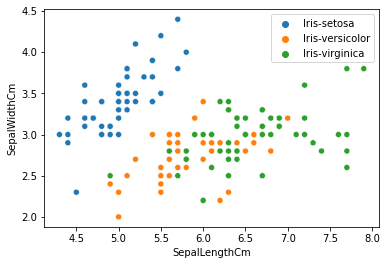

In [9]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_dataset)

# Placing Legend
plt.legend(loc=1)

plt.show()

### ii-Counter Plot 

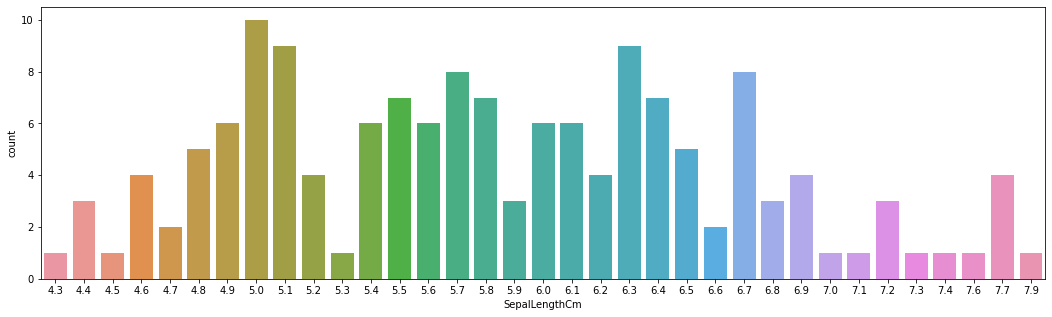

In [10]:
plt.figure(figsize=(18,5))
sns.countplot(x='SepalLengthCm', data=iris_dataset)
plt.show()

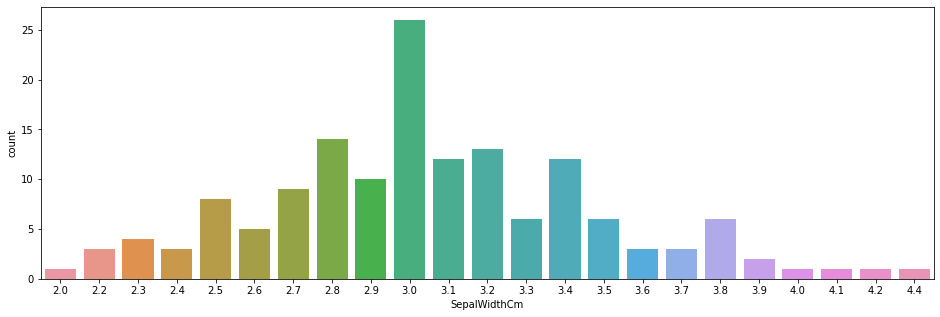

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x='SepalWidthCm', data=iris_dataset)
plt.show()

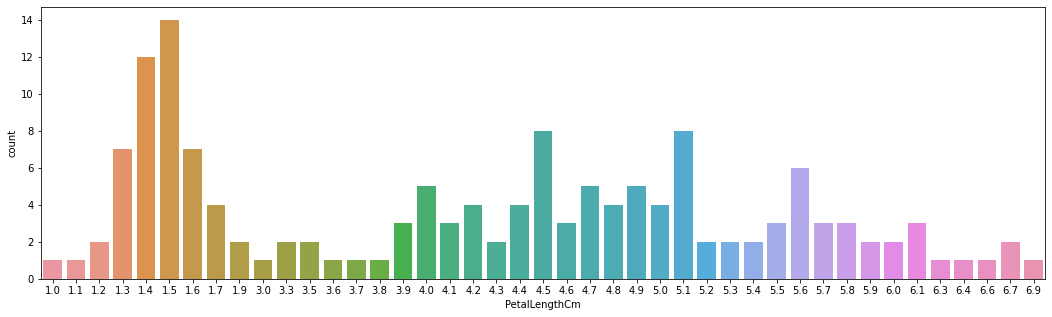

In [12]:
plt.figure(figsize=(18,5))
sns.countplot(x='PetalLengthCm', data=iris_dataset)
plt.show()

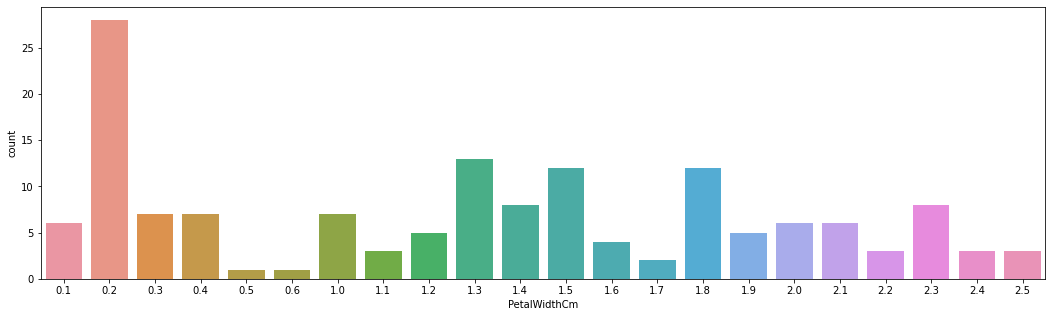

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(x='PetalWidthCm', data=iris_dataset)
plt.show()

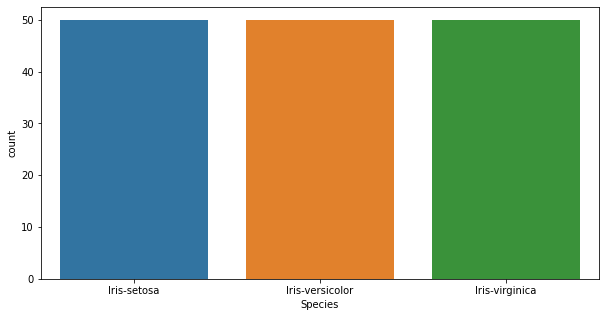

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Species', data=iris_dataset)
plt.show()

### iii-Pair Plot 

<Figure size 1440x360 with 0 Axes>

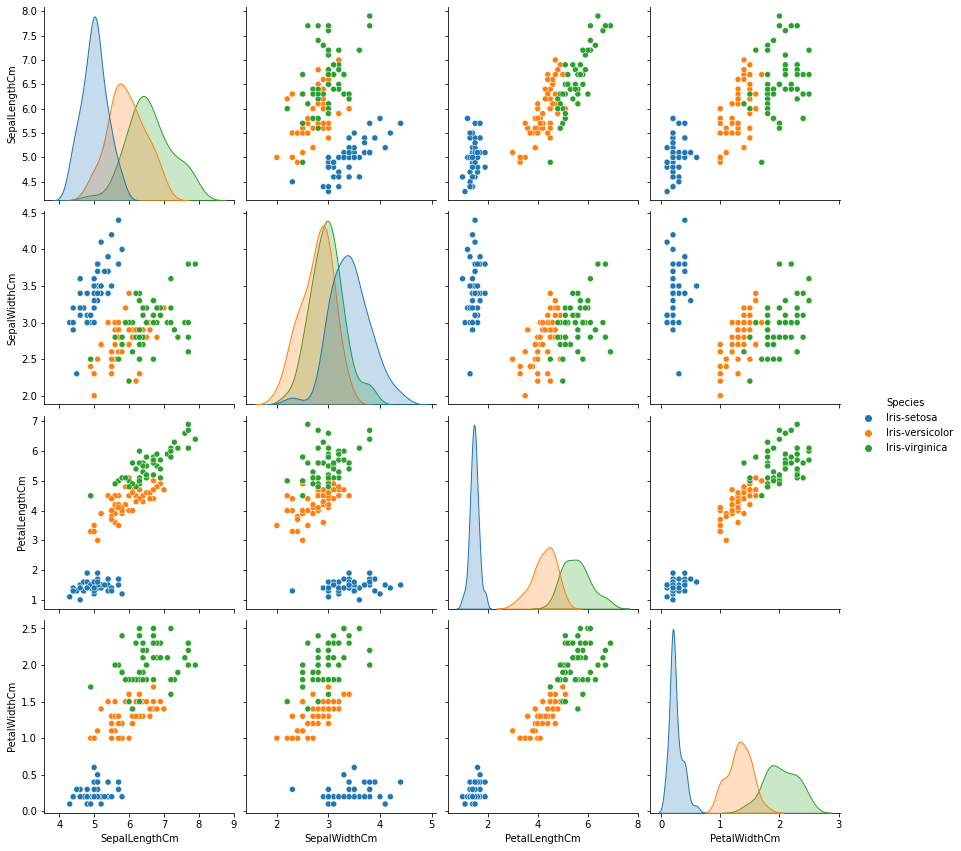

In [15]:
plt.figure(figsize=(20,5))
sns.pairplot(iris_dataset.drop(['Id'], axis=1), hue='Species', height=3)
plt.show();

### iv- BoxPlot 

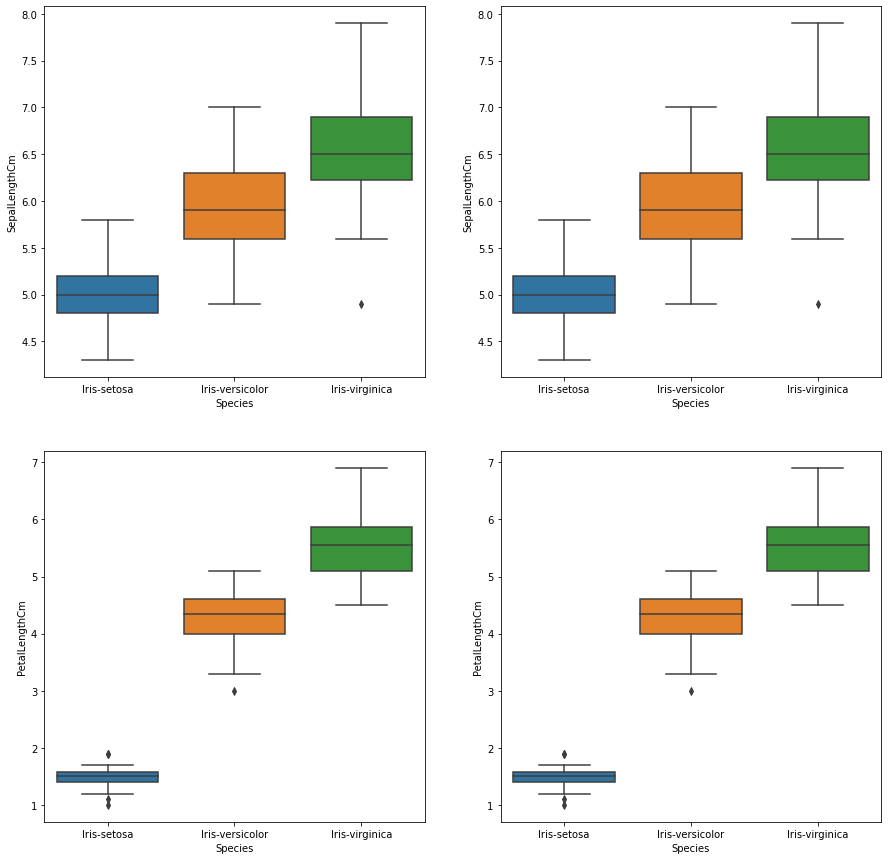

In [16]:
def graph(y):
    sns.boxplot(x='Species',y=y, data=iris_dataset)

plt.figure(figsize=(15,15))

plt.subplot(221)
graph('SepalLengthCm')
plt.subplot(222)
graph('SepalLengthCm')
plt.subplot(223)
graph('PetalLengthCm')
plt.subplot(224)
graph('PetalLengthCm')


plt.show();


# 6- Split The Dataset & Convert it into Array

In [17]:
iris_dataset_split = iris_dataset.drop('Species', axis=1)
iris_dataset_split = np.array(iris_dataset_split)

In [18]:
iris_dataset_split[:4]

array([[1. , 5.1, 3.5, 1.4, 0.2],
       [2. , 4.9, 3. , 1.4, 0.2],
       [3. , 4.7, 3.2, 1.3, 0.2],
       [4. , 4.6, 3.1, 1.5, 0.2]])

# 7- Use Unsupervised Model (K-Means Clustering)

In [19]:
from sklearn.cluster import KMeans
k_means_cluster = KMeans(n_clusters=3, random_state=0)
k_means_cluster.fit(iris_dataset_split)
y_pred= k_means_cluster.predict(iris_dataset_split)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 8- Visualize The Predicted Data

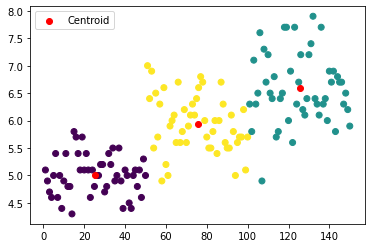

In [20]:
plt.scatter(iris_dataset_split[:,0], iris_dataset_split[:,1], c=y_pred)
plt.scatter(k_means_cluster.cluster_centers_[:,0], k_means_cluster.cluster_centers_[:,1], c='red', label='Centroid')
plt.legend()
plt.show()